In [ ]:
# DataFrame
import pandas as pd 

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('vader_lexicon')

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Utility
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle
import eli5

In [ ]:
# Read Data
data = pd.read_json('C:/Users/Tony/Downloads/Health_and_Personal_Care_5.json', lines=True)

In [ ]:
data

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,ALC5GH8CAMAI7,159985130X,AnnN,"[1, 1]",This is a great little gadget to have around. ...,5,Handy little gadget,1294185600,"01 5, 2011"
1,AHKSURW85PJUE,159985130X,"AZ buyer ""AZ buyer""","[1, 1]",I would recommend this for a travel magnifier ...,4,Small & may need to encourage battery,1329523200,"02 18, 2012"
2,A38RMU1Y5TDP9,159985130X,"Bob Tobias ""Robert Tobias""","[75, 77]",What I liked was the quality of the lens and t...,4,Very good but not great,1275955200,"06 8, 2010"
3,A1XZUG7DFXXOS4,159985130X,Cat lover,"[56, 60]",Love the Great point light pocket magnifier! ...,4,great addition to your purse,1202428800,"02 8, 2008"
4,A1MS3M7M7AM13X,159985130X,Cricketoes,"[1, 1]",This is very nice. You pull out on the magnifi...,5,Very nice and convenient.,1313452800,"08 16, 2011"
...,...,...,...,...,...,...,...,...,...
346350,A11J1FHCK5U06J,B00LJBMCKK,Karinna Ball,"[1, 1]",My appetite is definitely suppressed - my ener...,5,Great ingredients!,1405555200,"07 17, 2014"
346351,AFVKI7BCS3FSX,B00LJBMCKK,Laura hogan,"[0, 0]",I was drawn to this particular brand because o...,5,Great!,1405468800,"07 16, 2014"
346352,A1Y3FEUELH3FTI,B00LJBMCKK,Onlinesalesgirl,"[0, 0]","Great Product, Gave extra energy without the j...",5,Energy minus the jitters,1405123200,"07 12, 2014"
346353,A11LC938XF35XN,B00LJBMCKK,"SJ Blouse ""Stacey""","[0, 0]",I get lots of energy from this product. I felt...,5,I get lots of energy from this product.,1405641600,"07 18, 2014"


In [ ]:
# Count number of products
data['asin'].nunique()

18534

In [ ]:
# Count each rating quantity
data['overall'].value_counts()

5    211633
4     68168
3     33254
2     16754
1     16546
Name: overall, dtype: int64

In [ ]:
# Number of positives vs. negatives tagged sentences (without netural reviews)
positives = data['overall'][(data.overall == 5) | (data.overall == 4)]
negatives = data['overall'][(data.overall == 2) | (data.overall == 1)]

print('Total length of the data is: {}'.format(data.shape[0]))
print('No. of positve tagged sentences is: {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is: 346355
No. of positve tagged sentences is: 279801
No. of negative tagged sentences is: 33300


In [ ]:
# Data for visualization
data_viz = data.copy()

In [ ]:
# We use this to give a weight to the helpful reviews and we also applied smoothing.
data['score'] = data.helpful.apply(lambda x: x[0] / (x[1] + 2))
data_posi = data[(data.overall == 5) | (data.overall == 4)]
data_posi_1 = data_posi.sample(n= 32000, weights=data.score, random_state=42)
data_nega = data[(data.overall == 2) | (data.overall == 1)]
data_nega_1 = data_nega.sample(n= 32000, random_state=42)

In [ ]:
# Combine selected positive and negative ratings
data_all = pd.concat([data_posi_1, data_nega_1])

In [ ]:
# Positive class: 1, Negative class: 0
def sentiment_score(n):
 if n == 5 or n == 4:
    return 1
 return 0
data_all['overall']=data_all['overall'].apply(lambda x: sentiment_score(x))

In [ ]:
data_all['overall'].value_counts()

1    32000
0    32000
Name: overall, dtype: int64

In [ ]:
# Drop Unneccessary columns
data_all = data_all.drop(['reviewerName', 'helpful', 'unixReviewTime', 'reviewTime', 'score', 'summary', 'asin', 'reviewerID'], axis=1)

In [ ]:
# Reset index
data_all.reset_index().drop(['index'], axis=1)

,reviewText,overall
0,"My stepdad needed a shower chair, and the ones...",1
1,It works. However it had a lot of bubbles ins...,1
2,We bought these for my 8 year old with high-fu...,1
3,I've owned a front-loader (HE) washing machine...,1
4,"Good value for use in the home; not too big, n...",1
...,...,...
63995,Picked up a pair of Duracell AA batteries on a...,0
63996,This dried up after only one or two sparse use...,0
63997,I had dislocated and broken my shoulder nearly...,0
63998,When I was a child I remember reading a short ...,0


# Data Visualization

In [ ]:
# Positive class - 1, Negative class - 0
def sentiment_score(n):
 if n == 5 or n == 4:
    return 1
 return 0

data_viz['overall']= data_viz['overall'].apply(lambda x: sentiment_score(x))

In [ ]:
# Count for each products'positive and negative rating
data_viz.groupby(['asin', 'overall']).size()

asin        overall
159985130X  0           2
            1          18
1933622865  0           4
            1           7
1935009656  1           7
                       ..
B00LFB2ENY  1          25
B00LIASY0Y  0           6
            1          28
B00LJBMCFA  1          12
B00LJBMCKK  1          13
Length: 33227, dtype: int64

In [ ]:
# Average of products' review count
avg_count_review = data_viz.groupby('asin').size()[0:].mean()

In [ ]:
# Select negative reviews's count for each product
negative = data_viz[data_viz['overall']==0].groupby('asin')['overall'].count()

In [ ]:
negative = pd.DataFrame([negative]).transpose()

In [ ]:
negative

,overall
asin,
159985130X,2
1933622865,4
3812028492,2
7884890364,2
B00000J47L,17
...,...
B00KPLDX58,2
B00KTSHBZ0,1
B00KXE9RWU,1


In [ ]:
# Select positive reviews's count for each product
positive = data_viz[data_viz['overall']==1].groupby('asin')['overall'].count()

In [ ]:
positive = pd.DataFrame([positive]).transpose()

In [ ]:
positive

,overall
asin,
159985130X,18
1933622865,7
1935009656,7
3812028492,7
7884890364,31
...,...
B00LDUS8H8,11
B00LFB2ENY,25
B00LIASY0Y,28


In [ ]:
# Merge positive and negative count for each product
data_ratio = positive.merge(negative, left_on='asin', right_on='asin', how = 'left')

In [ ]:
data_ratio.isnull().sum()

overall_x       0
overall_y    3823
dtype: int64

In [ ]:
data_ratio.fillna(0)

,overall_x,overall_y
asin,,
159985130X,18,2.0
1933622865,7,4.0
1935009656,7,0.0
3812028492,7,2.0
7884890364,31,2.0
...,...,...
B00LDUS8H8,11,0.0
B00LFB2ENY,25,0.0
B00LIASY0Y,28,6.0


In [ ]:
data_ratio

,overall_x,overall_y
asin,,
159985130X,18,2.0
1933622865,7,4.0
1935009656,7,NaN
3812028492,7,2.0
7884890364,31,2.0
...,...,...
B00LDUS8H8,11,NaN
B00LFB2ENY,25,NaN
B00LIASY0Y,28,6.0


In [ ]:
data_ratio['sum_reviews'] = data_ratio['overall_x'] + data_ratio['overall_y']

In [ ]:
# Filter reviews that are greater than the average review counts
data_ratio = data_ratio[data_ratio['sum_reviews'] >= avg_count_review]

In [ ]:
data_ratio

,overall_x,overall_y,sum_reviews
asin,,,
159985130X,18,2.0,20.0
7884890364,31,2.0,33.0
B00000J47L,36,17.0,53.0
B00000JHQ6,70,9.0,79.0
B00000JHQC,66,5.0,71.0
...,...,...,...
B00K8GTETO,39,1.0,40.0
B00KIZQERA,20,1.0,21.0
B00KORUGXK,16,3.0,19.0


In [ ]:
data_ratio.isnull().sum()

overall_x      0
overall_y      0
sum_reviews    0
dtype: int64

In [ ]:
# Calculate the negative review rate of each product
data_ratio['review_ratio'] = data_ratio['overall_y'] /(data_ratio['overall_y'] + data_ratio['overall_x'])

In [ ]:
data_ratio['review_ratio'].sort_values(ascending = False)

asin
B00GY9DJCC    0.948718
B000GP1O4U    0.896552
B0021AF9GC    0.888889
B00AN5LADI    0.882353
B003KVO0GQ    0.831325
                ...   
B0006HUVXI    0.013514
B00E9M4XE4    0.009346
B00J7HQ1L4    0.008264
B00I9J7KSY    0.007752
B00DP5VX58    0.006849
Name: review_ratio, Length: 4406, dtype: float64

In [ ]:
# Filter most negative review products
data_ratio.review_ratio[data_ratio['review_ratio'] > 0.8].sort_values(ascending = False).keys()

Index(['B00GY9DJCC', 'B000GP1O4U', 'B0021AF9GC', 'B00AN5LADI', 'B003KVO0GQ',
       'B00BLXEWS6', 'B0033TE0KG', 'B006JKY3X0', 'B00AEKJMN2'],
      dtype='object', name='asin')

In [ ]:
# negative review products
# B00GY9DJCC: https://www.amazon.com/Bowflex-100350-Boost-Activity-Tracker/dp/B00GY9DJCC
# B000GP1O4U: https://www.amazon.com/First-Aid-Only-Person-Plastic/dp/B000GP1O4U
# B0021AF9GC: https://www.amazon.com/Glowelle-Powder-Pomegranate-Lychee-30-Count/product-reviews/B0021AF9GC
# B00AN5LADI: https://www.amazon.in/Veet-Easy-Roll-Remover-Count/dp/B00AN5LADI

In [ ]:
data_ratio['review_ratio'].sort_values(ascending = True)

asin
B00DP5VX58    0.006849
B00I9J7KSY    0.007752
B00J7HQ1L4    0.008264
B00E9M4XE4    0.009346
B0006HUVXI    0.013514
                ...   
B003KVO0GQ    0.831325
B00AN5LADI    0.882353
B0021AF9GC    0.888889
B000GP1O4U    0.896552
B00GY9DJCC    0.948718
Name: review_ratio, Length: 4406, dtype: float64

In [ ]:
# Filter most positive review products
pos_index = data_ratio.review_ratio[data_ratio['review_ratio'] < 0.05].sort_values(ascending = False).keys()

In [ ]:
data_neg = data.copy()

In [ ]:
data_neg_1 = data.copy()

In [ ]:
data_neg = data_neg[data_neg['asin'].isin(['B00GY9DJCC', 'B000GP1O4U', 'B0021AF9GC', 'B00AN5LADI', 'B003KVO0GQ',
                                           'B00BLXEWS6', 'B0033TE0KG', 'B006JKY3X0', 'B00AEKJMN2'])]

In [ ]:
data_neg

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,score
57823,A3TA0BXR9SKJB2,B000GP1O4U,A. D. Boorman,"[1, 1]",This is not a bad little first aid kit. It's t...,1,highly overpriced,1327708800,"01 28, 2012",0.333333
57824,A39H1GO9E3YQIB,B000GP1O4U,a,"[1, 2]","I opened the box from Amazon, and I quickly di...",1,Really? For 25 People?,1327968000,"01 31, 2012",0.250000
57825,A2K75QOCP9ZHSL,B000GP1O4U,"A. John ""military mom""","[3, 3]",Was delighted to get this since our Johnson & ...,2,Save your money and get something else,1328659200,"02 8, 2012",0.600000
57826,A1R76R4E6A8S3B,B000GP1O4U,Akash,"[1, 1]",I'll echo the sentiments of all the other revi...,2,Wouldn't trust it in a pinch,1329264000,"02 15, 2012",0.333333
57827,AOMKUI325W2TJ,B000GP1O4U,Alberto Vargas,"[1, 1]",This is a large yet basic first aid kit. It co...,3,for small surface wounds only,1327536000,"01 26, 2012",0.333333
...,...,...,...,...,...,...,...,...,...,...
335803,A1KXONFPU2XQ5K,B00GY9DJCC,Stephanie Manley,"[0, 0]",So I have had the benefit of using more than 1...,2,Not my favorite activity tracker,1391904000,"02 9, 2014",0.000000
335804,A3R19YKNL641X3,B00GY9DJCC,"Thomas Duff ""Duffbert""","[0, 0]",It seems like every fitness company wants to h...,2,"It's a ""me too"" product that doesn't do anythi...",1392768000,"02 19, 2014",0.000000
335805,A1M7Y63Y5GYJI1,B00GY9DJCC,Tracey Carter,"[3, 4]",Maybe I'm a little biased having tried the Jaw...,2,Okay Activity Tracker But Not Great (At Least ...,1390176000,"01 20, 2014",0.500000
335806,A2GHU8I0P3HFRW,B00GY9DJCC,"Wandrwoman ""Wise as Aphrodite, Beautiful as A...","[0, 0]","In this crazy, over promise, under deliver wor...",2,Inaccurate and Inefficient...But What the Hey?,1389398400,"01 11, 2014",0.000000


In [ ]:
# Filter negative reviews
data_neg = data_neg[data_neg['overall'].isin(['1', '2'])]

In [ ]:
data_neg_1 = data_neg_1[data_neg_1['asin'].isin(['B00GY9DJCC'])]

In [ ]:
data_neg_1

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,score
335769,A1UKA7HUAQAMY,B00GY9DJCC,"Alison Hudson ""Ariamythe""","[0, 0]",I have been wearing a FitBit Flex for five mon...,2,A substandard activity tracker,1389830400,"01 16, 2014",0.000000
335770,A3L8XRYMLZZES6,B00GY9DJCC,"Amazon Customer ""smart reader""","[0, 0]",I really wanted to like this band because I re...,1,"Not accurate, not even close",1389830400,"01 16, 2014",0.000000
335771,A3IIYC4PF1DTG9,B00GY9DJCC,"Ariel Meadow Stallings ""Author, Offbeat Bride""","[0, 0]","I've had a FitBit One for a while, and was cur...",1,It's huge,1390435200,"01 23, 2014",0.000000
335772,A1HYH206E18XVC,B00GY9DJCC,Bass Cadet,"[0, 0]",Compared to other activity trackers/pedometers...,2,+ *: Works OK but needs interface improvement,1392163200,"02 12, 2014",0.000000
335773,A1FK14ZCV3B1RA,B00GY9DJCC,Bladen's Mommy,"[0, 0]",I'm a runner and I currently own the Fitbit Fl...,1,"If you're looking for a fitness band, consider...",1392768000,"02 19, 2014",0.000000
335774,AO9UNKQG83BUP,B00GY9DJCC,Book Fan,"[0, 0]",This wrist tracker has similar capabilities to...,2,Passable wrist tracker,1392163200,"02 12, 2014",0.000000
335775,ANFJYYQ0P35CW,B00GY9DJCC,Chris Jaronsky,"[0, 0]",I received this activity tracker and was insta...,2,NEEDS TO BE IMPROVED,1388707200,"01 3, 2014",0.000000
335776,A6J8D9V5S9MBE,B00GY9DJCC,Curtis G,"[0, 0]","First of all, this thing is so big that I feel...",2,"No, I'm not on house arrest",1389830400,"01 16, 2014",0.000000
335777,A1S8FJT0AQSF60,B00GY9DJCC,C. Williamson,"[4, 5]",I got this through the Amazon Vines program fo...,1,Utterly useless...,1389139200,"01 8, 2014",0.571429
335778,AVXGN90BU95P8,B00GY9DJCC,"D. Buxman ""A Seeker of Truth""","[1, 1]",I don't know if this would be appropriate if y...,4,"Comfortable, Basic Activity Tracker",1391644800,"02 6, 2014",0.333333


In [ ]:
data_neg_1['reviewTime'] = pd.to_datetime(data_neg_1.reviewTime)

<AxesSubplot:xlabel='reviewTime', ylabel='overall'>

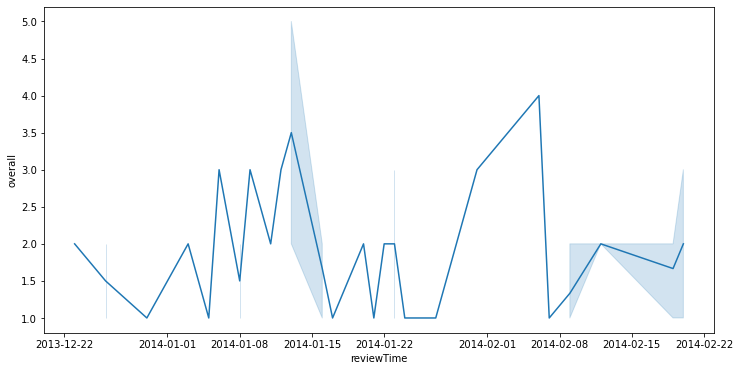

In [ ]:
# New rating change based on the rating time
plt.figure(figsize=(12,6))
sns.lineplot(data = data_neg_1, y ='overall', x = 'reviewTime')

In [ ]:
with open('C:/Users/Tony/Desktop/positive.txt') as f:
    pos_list = str(f.read()).split()
print(pos_list)

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [ ]:
with open('C:/Users/Tony/Desktop/negative.txt') as f:
    neg_list = str(f.read()).split()
print(neg_list)

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggress

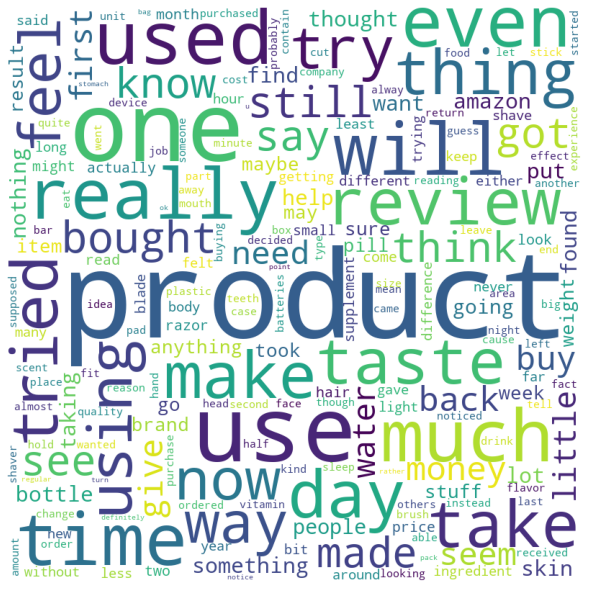

In [ ]:
# Create WordCloud for all the negative reviews 
  
# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
  
comment_words = ''
stopwords = STOPWORDS.union(neg_list).union(pos_list)
  
# iterate through the csv file
for val in data_nega.reviewText:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

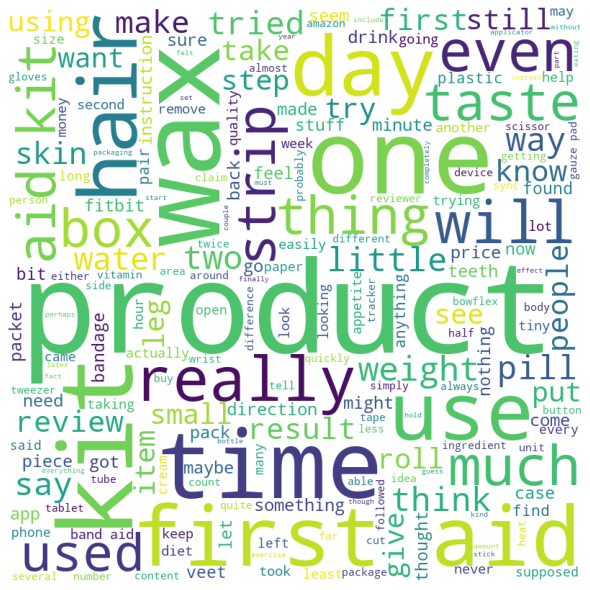

In [ ]:
# Create WordCloud for all the negative reviews with high negative ratio products
  
# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
  
comment_words = ''
stopwords = STOPWORDS.union(neg_list).union(pos_list)
  
# iterate through the csv file
for val in data_neg.reviewText:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [ ]:
data_pos = data.copy()

In [ ]:
data_pos = data_pos[data_pos['asin'].isin(pos_index)]

In [ ]:
data_pos = data_pos[data_pos['overall'].isin(['4', '5'])]

In [ ]:
data_pos

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,score
5555,A36TYQHF1UU685,B00006BN44,"A. Cartwright ""Amy Lynn Cartwright""","[2, 2]",my husband loves this powder and he uses it al...,5,my husband loves this powder and he uses it al...,1370563200,"06 7, 2013",0.500000
5556,A32TM7GN4U0GGL,B00006BN44,"Aiko Marinko ""Aiko""","[2, 9]",Talc is talc after all. And although this type...,4,FLESH COLOURED!,1261958400,"12 28, 2009",0.181818
5557,A2ZFUYSOCGO4MA,B00006BN44,Amazon Customer,"[0, 0]",This is a quintessential shower item. Have a s...,5,Fantastic Talc,1354492800,"12 3, 2012",0.000000
5558,A2PGDUYXZFAPT5,B00006BN44,"Amazon Customer ""I'm paranoiac in reverse - I...","[0, 0]",Apply liberally and be happier all day. The cl...,5,It's talc!,1356998400,"01 1, 2013",0.000000
5559,A3DI9THGHW91RQ,B00006BN44,"Amazon Customer ""tde""","[1, 1]",I use this powder after a shower or shave. it...,4,a little powder for your face,1388620800,"01 2, 2014",0.333333
...,...,...,...,...,...,...,...,...,...,...
345713,A2BY2OCHU9W2BA,B00KIZQERA,nidia nevill,"[1, 1]",I LOVE THIS CLEANSE IS GOOD AND MAKE YOU FEEL ...,5,WOW WOW GREAT PRODUCT,1402444800,"06 11, 2014",0.333333
345714,A1NHB2VC68YQNM,B00KIZQERA,Nurse Farrugia,"[0, 0]",It did a wonderful job with herbs rather than ...,5,This really cleans you out!,1403308800,"06 21, 2014",0.000000
345715,A11LC938XF35XN,B00KIZQERA,"SJ Blouse ""Stacey""","[2, 3]",I have used this product and am impressed that...,5,Works but still easy on your system,1402272000,"06 9, 2014",0.400000
345716,A2I8KUDXTC9WYI,B00KIZQERA,theresa,"[0, 0]",These are great for the intended use. They do...,5,Excellent Product,1402790400,"06 15, 2014",0.000000


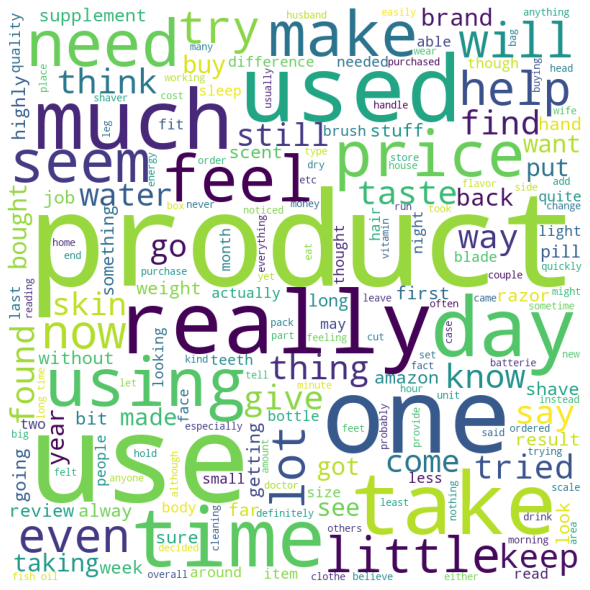

In [ ]:
# Create WordCloud for all the positive reviews
  
# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
  
comment_words = ''
stopwords = STOPWORDS.union(neg_list).union(pos_list)
  
# iterate through the csv file
for val in data_posi.reviewText:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

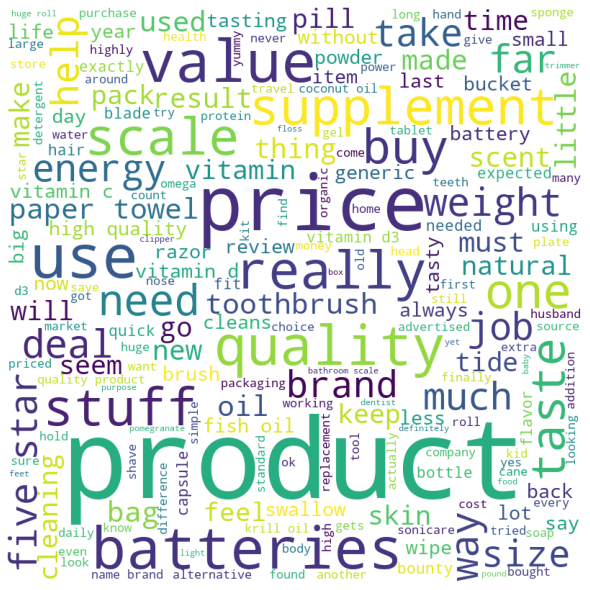

In [ ]:
# Create WordCloud for all the positive reviews with high positive ratio products
  
# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
  
comment_words = ''
stopwords = STOPWORDS.union(neg_list).union(pos_list)
  
# iterate through the csv file
for val in data_pos.summary:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [ ]:
data_viz['asin'].value_counts().keys()[0:10]

B0037KMI0U    1089
B0010JLMO8     767
B001KXZ808     699
B0049LUI9O     528
B000GIPJY8     475
B001F51VRK     469
B000NL0T1G     434
B001F51VS4     431
B004YHKUXC     427
B0032TNPOE     422
Name: asin, dtype: int64

In [ ]:
data_viz = data_viz[data_viz['asin'].isin(['B0037KMI0U', 'B0010JLMO8', 'B001KXZ808', 'B0049LUI9O', 'B000GIPJY8',
                                           'B001F51VRK', 'B000NL0T1G', 'B001F51VS4', 'B004YHKUXC', 'B0032TNPOE'])]

In [ ]:
data_viz.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
55790,A1U2HFSCT74J1R,B000GIPJY8,0282,"[0, 0]",Love the taste. Wish it was still on subscribe...,1,Love the taste,1405123200,"07 12, 2014"
55791,A3HMJIMEF2KUIG,B000GIPJY8,23,"[0, 0]",I had only ever purchased the double-chocolate...,1,Very Tasty,1396137600,"03 30, 2014"
55792,A1LYSN8RKX5VY2,B000GIPJY8,Aaron,"[0, 0]",I'm sure everyone knows about ON Gold Standard...,1,quality protein,1402963200,"06 17, 2014"
55793,A1OMS5QDZAZXIL,B000GIPJY8,A C,"[0, 0]",Can't go wrong with the quality and taste of a...,1,Gold Quality,1390867200,"01 28, 2014"
55794,ADNW0OX8LTUV0,B000GIPJY8,AdamCox,"[0, 0]",I usually fill my half gallon of skim milk up ...,1,Works & Tastes Good,1397779200,"04 18, 2014"


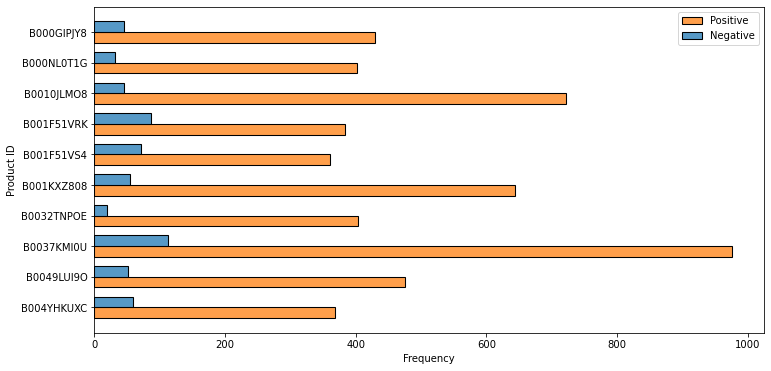

In [ ]:
# Top 10 popular product's review distribution
plt.figure(figsize=(12,6))
sns.histplot(data=data_viz, y="asin", multiple="dodge", hue="overall", shrink=.7)
plt.xlabel('Frequency')
plt.ylabel('Product ID')
plt.legend(labels=['Positive', 'Negative'])
plt.show()

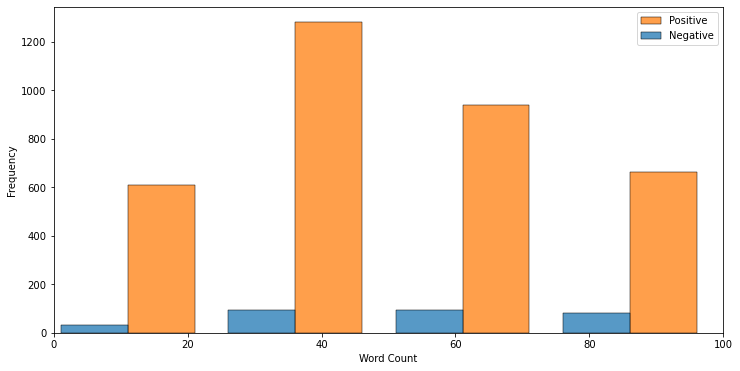

In [ ]:
# The count of positive and negative reviews based on their word count
def word_count(words):
    return len(words.split())
data_viz['word count'] = data_viz['reviewText'].apply(word_count)
plt.figure(figsize=(12,6))
sns.histplot(data=data_viz, x="word count", multiple="dodge", hue="overall", shrink=.8, bins=50)
plt.xlim(0,100)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend(labels=['Positive', 'Negative'])
plt.show()

<AxesSubplot:xlabel='overall', ylabel='count'>

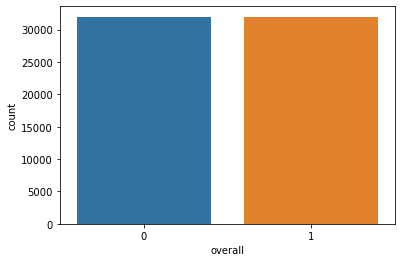

In [ ]:
# Check data count
sns.countplot(data_all['overall'])

In [ ]:
stops = set(stopwords.words("english"))
stops = stops.union(neg_list).union(pos_list)

AttributeError: 'set' object has no attribute 'words'

In [ ]:
stopwords.words("english")

AttributeError: 'set' object has no attribute 'words'

# Data Processing (nltk)

In [ ]:
def identify_tokens(row):
    reviews = row['reviewText']
    reviews = reviews.lower()
    tokens = nltk.word_tokenize(reviews)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

In [ ]:
def stem_list(row):
    stemming = PorterStemmer()
    my_list = row['tokenized']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return stemmed_list

In [ ]:
def remove_stops(row):
    stops = set(stopwords.words("english"))
    my_list = row['stemmed']
    meaningful_words = [w for w in my_list if not w in stops]
    return meaningful_words

In [ ]:
def rejoin_words(row):
    my_list = row['stopped_removed']
    joined_words = (" ".join(my_list))
    return joined_words

In [ ]:
def text_analytics():
    df = data_all
    df['tokenized'] = df.apply(identify_tokens, axis=1)
    df['stemmed'] = df.apply(stem_list, axis=1)
    df['stopped_removed'] = df.apply(remove_stops, axis=1)
    df['processed'] = df.apply(rejoin_words, axis=1)
    return df
    print(df.processed.to_string(index=False))

In [ ]:
data_all = text_analytics()

KeyboardInterrupt: 

In [ ]:
#data_all = data_all.drop(['stemmed', 'stopped_removed'], axis = 1)

In [ ]:
data_all

,reviewText,overall,tokenized,stemmed,stopped_removed,processed
114050,"My stepdad needed a shower chair, and the ones...",1,"[my, stepdad, needed, a, shower, chair, and, t...","[my, stepdad, need, a, shower, chair, and, the...","[stepdad, need, shower, chair, one, local, sto...",stepdad need shower chair one local store far ...
329492,It works. However it had a lot of bubbles ins...,1,"[it, works, however, it, had, a, lot, of, bubb...","[it, work, howev, it, had, a, lot, of, bubbl, ...","[work, howev, lot, bubbl, insid, chip, big, ju...",work howev lot bubbl insid chip big junk came ...
245270,We bought these for my 8 year old with high-fu...,1,"[we, bought, these, for, my, year, old, with, ...","[we, bought, these, for, my, year, old, with, ...","[bought, year, old, autism, easili, chew, like...",bought year old autism easili chew like tast t...
195288,I've owned a front-loader (HE) washing machine...,1,"[i, owned, a, he, washing, machine, since, as,...","[i, own, a, he, wash, machin, sinc, as, sugges...","[wash, machin, sinc, suggest, review, review, ...",wash machin sinc suggest review review thi pro...
46761,"Good value for use in the home; not too big, n...",1,"[good, value, for, use, in, the, home, not, to...","[good, valu, for, use, in, the, home, not, too...","[good, valu, use, home, big, small, easili, di...",good valu use home big small easili dispos use...
...,...,...,...,...,...,...
179920,Picked up a pair of Duracell AA batteries on a...,0,"[picked, up, a, pair, of, duracell, aa, batter...","[pick, up, a, pair, of, duracel, aa, batteri, ...","[pick, pair, duracel, aa, batteri, vacat, rech...",pick pair duracel aa batteri vacat recharg die...
210206,This dried up after only one or two sparse use...,0,"[this, dried, up, after, only, one, or, two, s...","[thi, dri, up, after, onli, one, or, two, spar...","[thi, dri, onli, one, two, spars, use, hardli,...",thi dri onli one two spars use hardli enough m...
112793,I had dislocated and broken my shoulder nearly...,0,"[i, had, dislocated, and, broken, my, shoulder...","[i, had, disloc, and, broken, my, shoulder, ne...","[disloc, broken, shoulder, nearli, six, month,...",disloc broken shoulder nearli six month ago mo...
44474,When I was a child I remember reading a short ...,0,"[when, i, was, a, child, i, remember, reading,...","[when, i, wa, a, child, i, rememb, read, a, sh...","[wa, child, rememb, read, short, children, sto...",wa child rememb read short children stori chea...


In [ ]:
print(data_all['processed'].values.shape)
print(data_all['overall'].values.shape)

(64000,)
(64000,)


# Text Representation

## Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
words = data_all['processed']
# Create the transform
vectorizer = CountVectorizer()
# Tokenize and build vocab
vectorizer.fit(words)
# Summarize
print(vectorizer.vocabulary_)
# Encode document
vector = vectorizer.transform(words)
# Summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'stepdad': 34556, 'need': 23856, 'shower': 32643, 'chair': 6193, 'one': 25249, 'local': 20621, 'store': 34743, 'far': 12766, 'stabl': 34298, 'enough': 11753, 'look': 20727, 'amazon': 1235, 'order': 25504, 'thi': 36890, 'love': 20842, 'wa': 40283, 'hi': 16559, 'hous': 16956, 'less': 20085, 'hour': 16945, 'noth': 24500, 'even': 12195, 'think': 36930, 'complain': 7557, 'sturdi': 34986, 'comfort': 7449, 'second': 31968, 'year': 41767, 'old': 25144, 'mother': 23113, 'law': 19891, 'lb': 19922, 'hubbi': 17038, 'sit': 32954, 'say': 31600, 'veri': 39867, 'get': 14677, 'work': 41420, 'howev': 16986, 'lot': 20803, 'bubbl': 4973, 'insid': 18175, 'chip': 6519, 'big': 3763, 'junk': 19122, 'came': 5452, 'nevertheless': 24026, 'great': 15390, 'bang': 2998, 'buck': 4983, 'bought': 4544, 'autism': 2593, 'easili': 11103, 'chew': 6440, 'like': 20296, 'tast': 35988, 'though': 37041, 'know': 19505, 'kid': 19335, 'nice': 24107, 'size': 32976, 'also': 1159, 'children': 6484, 'swallow': 35527, 'pill': 27303, 

(64000, 42152)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## N-grams

In [ ]:
def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [ ]:
import unicodedata
word = basic_clean(''.join(str(data_all['reviewText'].tolist())))

In [ ]:
word[:20]

['stepdad',
 'needed',
 'shower',
 'chair',
 'one',
 'local',
 'store',
 'far',
 'stable',
 'enough',
 'looked',
 'amazon',
 'ordered',
 'one',
 'loved',
 'house',
 'le',
 '24',
 'hour',
 'nothing']

In [ ]:
# 3 words
(pd.Series(nltk.ngrams(word, 3)).value_counts())[:10]

(per, gel, cap)                      835
(mg, gel, cap)                       536
(omega3, fish, oil)                  444
(per, 1000, mg)                      437
(1000, mg, omega3)                   436
(dont, waste, money)                 358
(last, long, time)                   332
(highly, recommend, product)         285
(cap, amazonrecommended, serving)    275
(gel, cap, amazonrecommended)        275
dtype: int64

In [ ]:
# 2 words
(pd.Series(nltk.ngrams(word, 2)).value_counts())[:10]

(work, well)           2746
(fish, oil)            2707
(much, better)         1904
(dont, know)           1895
(feel, like)           1694
(would, recommend)     1662
(highly, recommend)    1586
(side, effect)         1540
(gel, cap)             1529
(weight, loss)         1404
dtype: int64

## TF-IDF

In [ ]:
X = data_all['processed']
y = data_all['overall']

In [ ]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
vector_1 = TfidfVectorizer(sublinear_tf=True)
X = vector_1.fit_transform(X)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector_1.get_feature_names()))

Vector fitted.
No. of feature_words:  42152


In [ ]:
print(X.shape)
print(y.shape)

(64000, 42152)
(64000,)


# Model Building

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

## Logistic Regression (Best Model)

In [ ]:
def roc_auc_plot(fpr, tpr, roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, label='(area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [ ]:
def logistic(X_train, y_train):
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    log_y_pred_train = logreg.predict(X_train)
    log_test_as = metrics.accuracy_score(y_pred, y_test)
    log_train_as = metrics.accuracy_score(log_y_pred_train, y_train)
    y_prob = logreg.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    print("=============Confusion Matrix=============")
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(cf_matrix)
    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    print('\n')
    print("=============Key Metrics==================")
    print(classification_report(y_test, y_pred))
    print("=============ROC AUC======================")
    roc_auc_plot(fpr, tpr, roc_auc)
    print('AUC:', roc_auc)
    print(f"Accuracy score for train data : {log_train_as}")
    print(f"Accuracy score for test data : {log_test_as}")

=============Confusion Matrix=============
[[5380 1080]
 [ 986 5354]]


=============Key Metrics==================
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      6460
           1       0.83      0.84      0.84      6340

    accuracy                           0.84     12800
   macro avg       0.84      0.84      0.84     12800
weighted avg       0.84      0.84      0.84     12800

=============ROC AUC======================


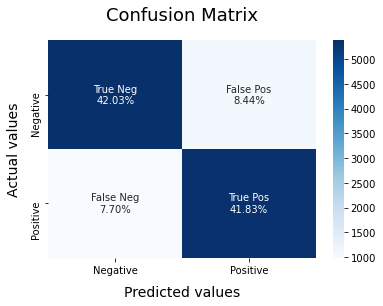

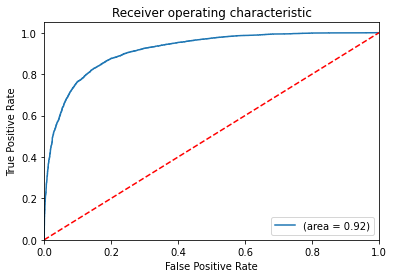

AUC: 0.9168600267601645
Accuracy score for train data : 0.87298828125
Accuracy score for test data : 0.83859375


In [ ]:
## Logistic Regression
logistic(X_train, y_train)

In [ ]:
# Feature Importance for logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
eli5.show_weights(estimator=logreg, 
                  feature_names= list(vector_1.get_feature_names()),
                  top=(25, 25))

Weight?,Feature
+8.679,great
+8.318,highli
+6.934,best
+6.848,love
+6.488,easi
+6.351,perfect
+6.347,amaz
+5.814,excel
+5.365,glad
+4.871,worri


## SVM

In [ ]:
def SVM(X_train, y_train):
    clf = LinearSVC(random_state=0, tol=1e-5)
    clf = CalibratedClassifierCV(clf)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    svm_y_pred_train = clf.predict(X_train)
    svm_test_as = metrics.accuracy_score(y_pred, y_test)
    svm_train_as = metrics.accuracy_score(svm_y_pred_train, y_train)
    y_prob = clf.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    print("=============Confusion Matrix=============")
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(cf_matrix)
    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    print('\n')
    print("=============Key Metrics==================")
    print(classification_report(y_test, y_pred))
    print("=============ROC AUC======================")
    roc_auc_plot(fpr, tpr, roc_auc)
    print('AUC:', roc_auc)
    print(f"Accuracy score for train data : {svm_train_as}")
    print(f"Accuracy score for test data : {svm_test_as}")

=============Confusion Matrix=============
[[5380 1080]
 [1020 5320]]


=============Key Metrics==================
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      6460
           1       0.83      0.84      0.84      6340

    accuracy                           0.84     12800
   macro avg       0.84      0.84      0.84     12800
weighted avg       0.84      0.84      0.84     12800

=============ROC AUC======================


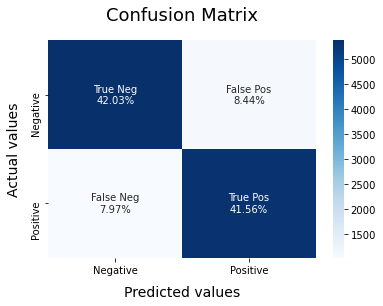

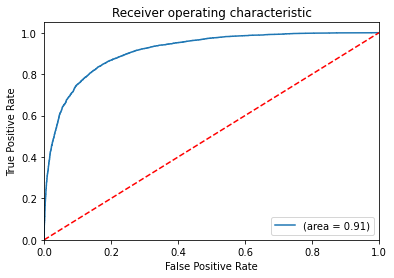

AUC: 0.9147425799142501
Accuracy score for train data : 0.91208984375
Accuracy score for test data : 0.8359375


In [ ]:
SVM(X_train, y_train)

## Random Forest

In [ ]:
# Random Forest
def rfc(X_train, y_train):
    rfc = RandomForestClassifier(n_estimators= 1000,min_samples_split= 2, min_samples_leaf= 2,max_features= 'sqrt',
                                 max_depth= 10,bootstrap= True).fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    y_prob = rfc.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    y_pred_train = rfc.predict(X_train)
    rf_train_score = metrics.accuracy_score(y_train, y_pred_train)
    rf_test_score = metrics.accuracy_score(y_test, y_pred)
    
    print("=============Confusion Matrix=============")
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(cf_matrix)
    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    print('\n')
    print("=============Key Metrics==================")
    print(classification_report(y_test, y_pred))
    print("=============ROC AUC======================")
    roc_auc_plot(fpr, tpr, roc_auc) 
    print('AUC:', roc_auc)
    print(f"Accuracy score for train data : {rf_train_score}")
    print(f"Accuracy score for test data : {rf_test_score}")

=============Confusion Matrix=============
[[5060 1400]
 [1962 4378]]


=============Key Metrics==================
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6460
           1       0.76      0.69      0.72      6340

    accuracy                           0.74     12800
   macro avg       0.74      0.74      0.74     12800
weighted avg       0.74      0.74      0.74     12800

=============ROC AUC======================


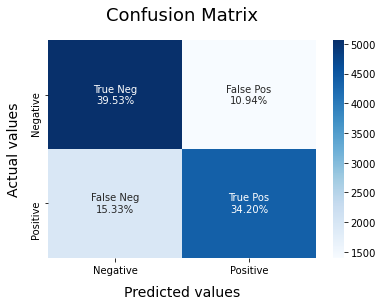

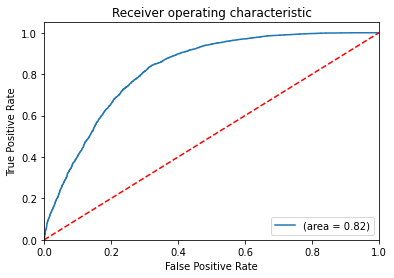

AUC: 0.8231147268802923
Accuracy score for train data : 0.76416015625
Accuracy score for test data : 0.73734375


In [ ]:
rfc(X_train, y_train)

## Tuning Parameters

In [ ]:
# Tuning parameters: GridSearchCV
rfc = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Create the parameter grid based on the results of random search 
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(param_grid)

{'bootstrap': [True, False],
 'max_depth': [1, 5, 10],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [500, 750, 1000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = param_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfc_random.fit(X_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 5, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [500, 750, 1000]},
                   random_state=42, verbose=2)

In [ ]:
rfc_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}